# Data Prep for Analyzing soundcat_custom_gallery (Instagram)

Files are downloaded as images from Inflact into a folder. Because it is difficult to discriminate between the first photos in a post and ones after for the same post, the file size is used to discern which is the first photo in a post. These first photos are then scraped for their text and placed into a dataframe. Further clean-up is performed to discern the brand, IEM, and the artist in the given photo. Cleaned data is exported to Excel for further analysis in, say, Tableau. 

In [1]:
# pip install opencv-python
# pip install pytesseract

In [2]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
# STORE FILE NAMES

def import_names(folder_dir):
    import os
    from os import listdir
    
    stored_images = []
    
    for i in os.listdir(folder_dir):
        stored_images.append(i)
    return stored_images

# CONVERT IMAGE TO TEXT

def image_to_text(directory):
    img = cv2.imread(directory)
    text = pytesseract.image_to_string(img)
    return text

# BRAND ASSIGNER

def brand_select(row):
    if row['64 Audio Flag'] == 1:
        val = "64 Audio"
    elif row['UE Flag'] == 1:
        val = "Ultimate Ears"
    elif row["JH Audio Flag"] == 1:
        val = "JH Audio"
    else:
        val = "Westone"
    return val

In [4]:
# Read in image names 

folder_dir = r"C:\Users\Theo Lee\Desktop\soundcat_custom_gallery_pt2" # set this to the folder the images are stored 
names = import_names(folder_dir)

In [5]:
# Check file size

full_names = []
cleaned_names = []

for i in names:
    path = r'C:\Users\Theo Lee\Desktop\soundcat_custom_gallery_pt2'
    full_path = (path+"\\"+i)
    full_names.append(full_path)
    
import os 
for i in full_names:
    size = os.path.getsize(i)
    if size < 75000: # see cell below, take lower quartile  
        cleaned_names.append(i)
       

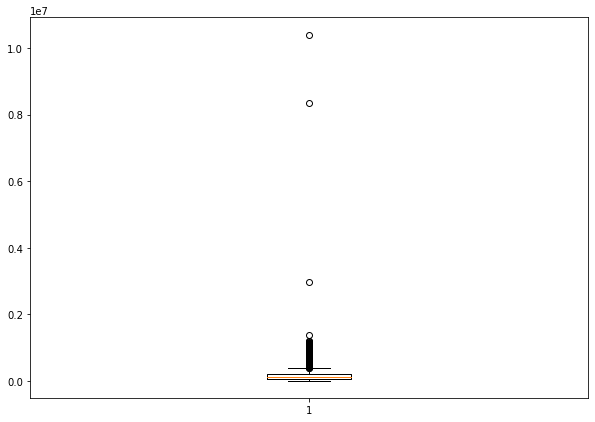

In [6]:
# visualizing split for file size threshold
sizes = []
for i in full_names:
    size = os.path.getsize(i)
    sizes.append(size)

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(sizes)
 
# show plot
plt.show()

In [7]:
cleaned_names[0][54:64]

'2015-02-09'

In [8]:
# Convert images to text and store in dataframe

text_data = []
date_data = []

for i in cleaned_names:
    text_length = len(image_to_text(i))
    if text_length > 5: # to remove posts with no text
        text_data.append(image_to_text(i))
        date_data.append(i[54:64]) # slice date
        
import pandas as pd
d = {'Text':text_data,'Date':date_data}
df = pd.DataFrame(d)
df.head(10)

,Text,Date
0,rex ba\n\nVe\n\n,2015-06-19
1,gi oe\n,2015-06-23
2,<\n\nMiles\n,2015-09-15
3,[Westone] ES60\n=S2ty| - 2|Z / Block B- ZICO\n,2016-05-16
4,[Westone] ES60\nB1A4 - t= / B1A4 - BARO\n,2016-05-17
5,[Westone] ES60\nBH - 212] / BigBang - G-DRAGON\n,2016-05-23
6,[Westone] ES60\nB7tARI - ofe4-9 / Guckkasten -...,2016-06-14
7,[Ultimate Ears] UE18PRO\nEXID - &2| / EXID - S...,2016-06-14
8,[Westone] ES50\nSID|L|E - 0|AZ / INFINITE - Le...,2016-06-16
9,[Westone] ES50\nBHELAIATt - 21 / BTS - JIN\n,2016-06-16


In [9]:
df_copy = df.copy()

In [10]:
df = df_copy

In [11]:
# formatting data
import numpy as np

df['64 Audio Flag'] = np.where(df['Text'].str.contains('64'), 1, 0) # flags for checking in Tableau 
df['UE Flag'] = np.where(df['Text'].str.contains('Ultimate Ears'),1,0)
df['JH Audio Flag'] = np.where(df['Text'].str.contains('JHA'),1,0)
df['Westone Flag'] = np.where(df['Text'].str.contains('Westone'),1,0)
df['Brand'] = df.apply(brand_select, axis=1) # check brand 

df2 = df['Text'].str.split('/', expand=True)[1].str.split('\n',expand=True)[0] # get artist
df = df.join(df2)
df.rename({0: 'Artist'}, axis=1, inplace=True)

df3 = df['Text'].str.split(']',expand=True)[1].str.split('\n',expand=True)[0] # get IEM
df3.head()
df = df.join(df3)
df.rename({0:'IEM'}, axis=1, inplace=True)

df.head(20)

,Text,Date,64 Audio Flag,UE Flag,JH Audio Flag,Westone Flag,Brand,Artist,IEM
0,rex ba\n\nVe\n\n,2015-06-19,0,0,0,0,Westone,None,None
1,gi oe\n,2015-06-23,0,0,0,0,Westone,None,None
2,<\n\nMiles\n,2015-09-15,0,0,0,0,Westone,None,None
3,[Westone] ES60\n=S2ty| - 2|Z / Block B- ZICO\n,2016-05-16,0,0,0,1,Westone,Block B- ZICO,ES60
4,[Westone] ES60\nB1A4 - t= / B1A4 - BARO\n,2016-05-17,0,0,0,1,Westone,B1A4 - BARO,ES60
5,[Westone] ES60\nBH - 212] / BigBang - G-DRAGON\n,2016-05-23,0,0,0,1,Westone,BigBang - G-DRAGON,ES60
6,[Westone] ES60\nB7tARI - ofe4-9 / Guckkasten -...,2016-06-14,0,0,0,1,Westone,Guckkasten - Ha Hyun Woo,ES60
7,[Ultimate Ears] UE18PRO\nEXID - &2| / EXID - S...,2016-06-14,0,1,0,0,Ultimate Ears,EXID - Sol Ji,UE18PRO
8,[Westone] ES50\nSID|L|E - 0|AZ / INFINITE - Le...,2016-06-16,0,0,0,1,Westone,INFINITE - Lee Sung Jong,ES50
9,[Westone] ES50\nBHELAIATt - 21 / BTS - JIN\n,2016-06-16,0,0,0,1,Westone,BTS - JIN,ES50


In [12]:
# export as Excel file 
df.to_excel(r"C:\Users\Theo Lee\Downloads\SoundCatData_pt2.xlsx")